In [15]:
import sys 
sys.path.append('/home/XXXX/GitRepo_Brats23/UNN_BraTS23/scripts')
import data_transforms
from data_loader import load_data
import data_preparation_OptiNet
from utils import utils
import argparse
import matplotlib.pyplot as plt
import os 
import numpy as np 
import nibabel as nib


In [2]:
import inspect
inspect.getsource(data_preparation_OptiNet.preprocess_data)

'def preprocess_data(data_dir, args):\n    \'\'\'\n    Function that applies all desired preprocessing steps to an image, as well as to its \n    corresponding ground truth image.\n\n    Returns: preprocessed image (not yet converted to tensor)\n    img is still a list of arrays of the 4 modalities from data files\n    mask is 3d array\n    return img as list of arrays, and mask as before\n    \'\'\'\n    filePaths = json.load(open(os.path.join(data_dir,\'dataset.json\'), "r"))\n    pair = filePaths[args.preproc_set]\n\n    outpath = os.path.join(data_dir, args.data_grp + "_prepoc")\n    # call(f"mkdir -p {outpath}", shell=True)\n\n    # Load and transform the images and segmentations\n    print("pair :" , pair)\n    print(pair[0])\n    print(args.data)\n    transformed_subject = load_and_transform_images((pair[0], args.data), saving=False)\n    # run_parallel(load_and_transform_images, list(zip(pair, itertools.repeat(args.data))))\n    return transformed_subject\n'

In [3]:
inspect.getsource(data_preparation_OptiNet.load_and_transform_images)

'def load_and_transform_images(inputs, saving =True):\n    logger = logging.getLogger(__name__)\n    \n    pair, data_path = inputs\n    \n    logger.info("Image-Label pairs are: ", pair)\n    logger.info("Mode is: ", pair)\n\n    mode = "training"\n    # mode = "test"\n\n    image_path = pair["image"]\n    if mode == "training":\n        print("Having labels")\n        label_path = pair["label"]\n        transL = [\'checkRAS\',\'ohe\',\'ZnormFore\']\n        subject = tio.Subject(\n            image=tio.ScalarImage(os.path.join(data_path, image_path)),\n            label=tio.LabelMap(os.path.join(data_path, label_path))\n        )\n    else:\n        subject = tio.Subject(\n            image=tio.ScalarImage(os.path.join(data_path, image_path)))\n        transL = [\'checkRAS\',\'ZnormFore\']\n\n    transform_pipeline = transforms_preproc(target_shape=True)\n\n    # transL = [\'CropOrPad\']\n    # OPTIONS ARE:\n                # \'checkRAS\' : to_ras,\n                # \'CropOrPad\' : 

In [4]:
class Args(argparse.Namespace):
    # data="/scratch/XXXX/Data/val_SSA"
    data = "/scratch/XXXX/Data/train_all/train_data"
    data_grp="SV"
    # preproc_set="test"
    preproc_set="training"
    data_used="SSA"

args=Args()

In [5]:
testsubject = data_preparation_OptiNet.preprocess_data(args.data, args)

pair : [{'image': 'images/BraTS-GLI-00000-000-stk.nii.gz', 'label': 'labels/BraTS-GLI-00000-000-lbl.nii.gz'}, {'image': 'images/BraTS-GLI-00002-000-stk.nii.gz', 'label': 'labels/BraTS-GLI-00002-000-lbl.nii.gz'}, {'image': 'images/BraTS-GLI-00003-000-stk.nii.gz', 'label': 'labels/BraTS-GLI-00003-000-lbl.nii.gz'}, {'image': 'images/BraTS-GLI-00005-000-stk.nii.gz', 'label': 'labels/BraTS-GLI-00005-000-lbl.nii.gz'}, {'image': 'images/BraTS-GLI-00006-000-stk.nii.gz', 'label': 'labels/BraTS-GLI-00006-000-lbl.nii.gz'}, {'image': 'images/BraTS-GLI-00008-000-stk.nii.gz', 'label': 'labels/BraTS-GLI-00008-000-lbl.nii.gz'}, {'image': 'images/BraTS-GLI-00008-001-stk.nii.gz', 'label': 'labels/BraTS-GLI-00008-001-lbl.nii.gz'}, {'image': 'images/BraTS-GLI-00009-000-stk.nii.gz', 'label': 'labels/BraTS-GLI-00009-000-lbl.nii.gz'}, {'image': 'images/BraTS-GLI-00009-001-stk.nii.gz', 'label': 'labels/BraTS-GLI-00009-001-lbl.nii.gz'}, {'image': 'images/BraTS-GLI-00011-000-stk.nii.gz', 'label': 'labels/BraTS-

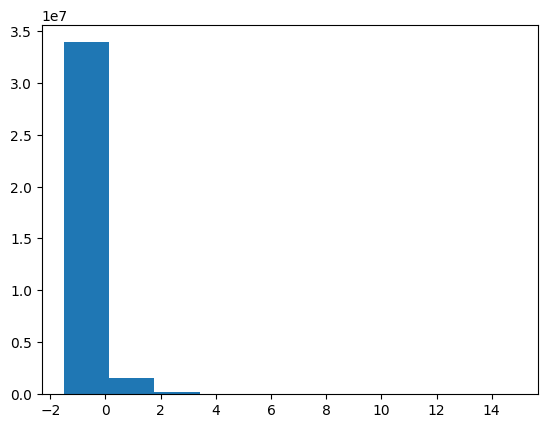

In [6]:
plt.hist(testsubject["image"].numpy().flatten())
plt.show()

In [7]:
testsubject["image"].numpy().shape

(4, 240, 240, 155)

In [34]:
processed_lbl = testsubject['label'].numpy()
processed_img = testsubject['image'].numpy()
print(processed_lbl.shape)

(4, 240, 240, 155)


In [35]:
raw_lbl =  np.array(nib.load("/scratch/XXXX/Data/train_all/train_data/labels/BraTS-GLI-00000-000-lbl.nii.gz").dataobj)
raw_img =  np.array(nib.load("/scratch/XXXX/Data/train_all/train_data/images/BraTS-GLI-00000-000-stk.nii.gz").dataobj)

In [36]:
print(raw_lbl.shape)

(240, 240, 155)


In [37]:
print(raw_img.shape)

(240, 240, 155, 4)


In [38]:
np.where(processed_lbl ==1)

(array([0, 0, 0, ..., 3, 3, 3]),
 array([  0,   0,   0, ..., 120, 120, 120]),
 array([  0,   0,   0, ..., 152, 153, 153]),
 array([ 0,  1,  2, ..., 77, 76, 77]))

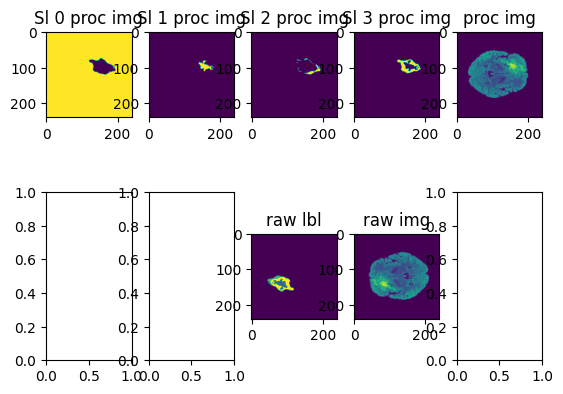

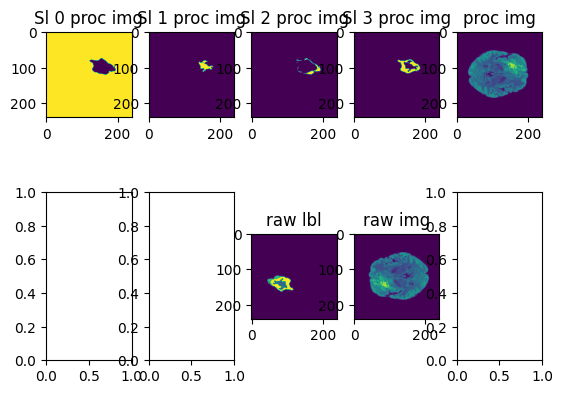

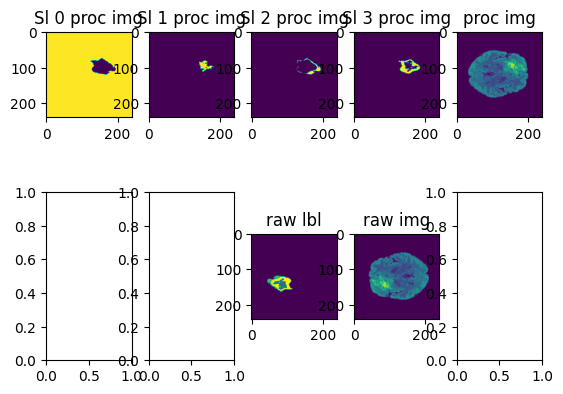

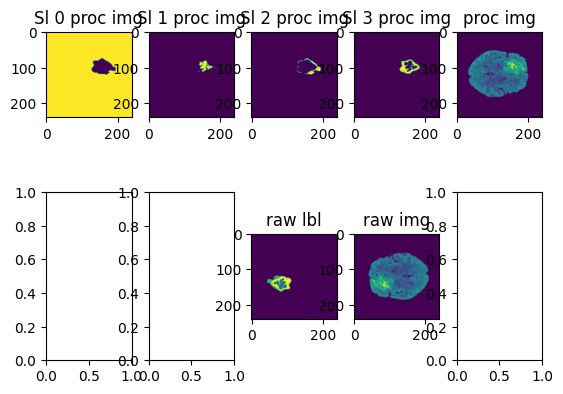

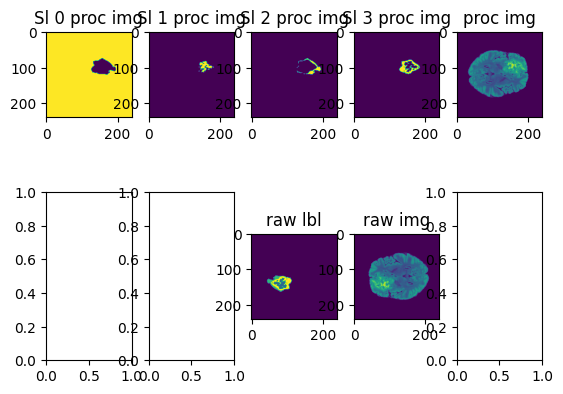

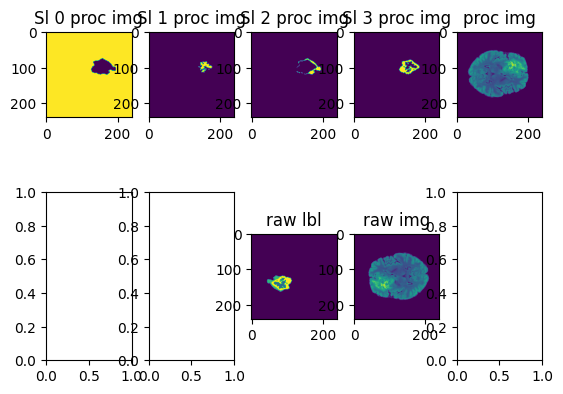

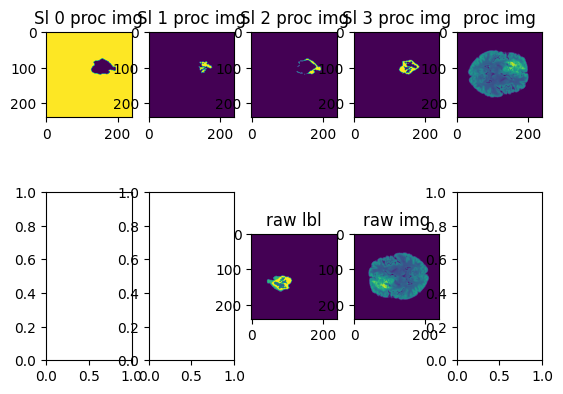

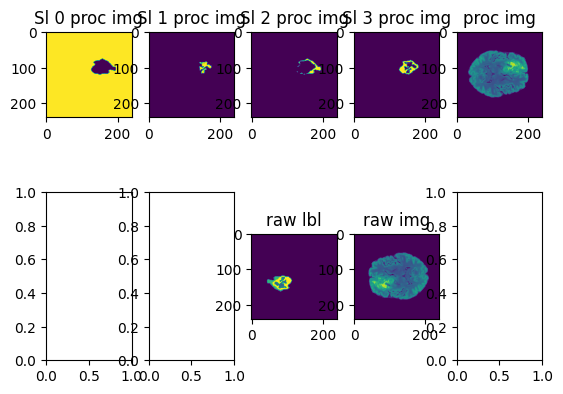

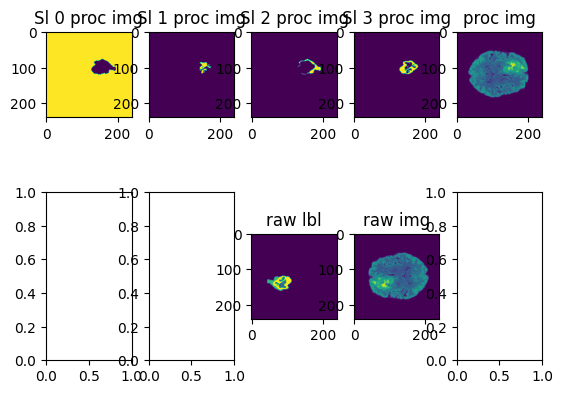

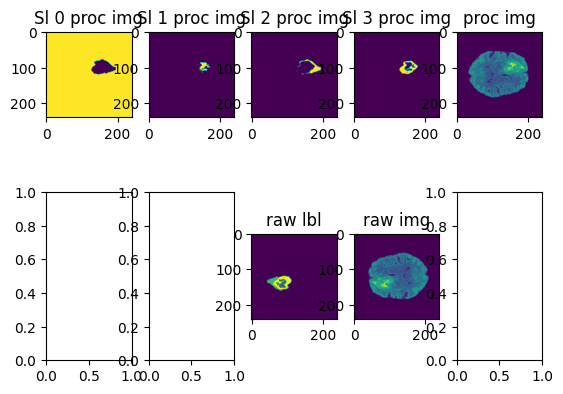

In [48]:
for i in range (70, 80):
    fig, ax = plt.subplots(2, 5) #, figsize=(10,10))
    for j in range (4):
        ax[0,j].imshow(processed_lbl[j, :, :, i])
        ax[0,j].set_title(f"Sl {j} proc img")
    ax[0,4].imshow(processed_img[0,:,:,i])
    ax[0,4].set_title("proc img") 
    ax[1,2].imshow(raw_lbl[:,:,i])
    ax[1,2].set_title("raw lbl")
    ax[1,3].imshow(raw_img[:,:,i,0])
    ax[1,3].set_title("raw img") 

    plt.show()
    

The only thing we notice is the tocanonical trnsform but rest looks fine.

In [24]:

lbl = np.load("/scratch/XXXX/Data/train_all/train_data/BraTS-GLI-00000-000/BraTS-GLI-00000-000-lbl.npy")
lbl.shape

(4, 240, 240, 155)

In [25]:
for i in range (4):
    print("CHANNEL ", i)
    print("Different values : ", set(lbl[i].flatten()))
    print("Number of ones : " , np.sum(lbl[i]==1))
    print("Number of zeros : " ,np.sum(lbl[i]==0))

CHANNEL  0
Different values :  {0.0, 1.0}
Number of ones :  8870695
Number of zeros :  57305
CHANNEL  1
Different values :  {0.0, 1.0}
Number of ones :  11738
Number of zeros :  8916262
CHANNEL  2
Different values :  {0.0, 1.0}
Number of ones :  12836
Number of zeros :  8915164
CHANNEL  3
Different values :  {0.0, 1.0}
Number of ones :  32731
Number of zeros :  8895269


In [26]:
nifti_lbl = nib.load("/scratch/XXXX/Data/train_all/train_data/BraTS-GLI-00000-000/BraTS-GLI-00000-000-lbl.nii.gz")
lbl2 = np.array(nifti_lbl.dataobj)
print("Shape : " , lbl2.shape)
print("Set of different values : ",set(lbl2.flatten()))

Shape :  (240, 240, 155)
Set of different values :  {0.0, 1.0, 2.0, 3.0}


In [27]:
for i in range (4):
    print("CHANNEL ", i)
    print(f"Number of values {i} : " , np.sum(lbl2==i))


CHANNEL  0
Number of values 0 :  8870695
CHANNEL  1
Number of values 1 :  11738
CHANNEL  2
Number of values 2 :  12836
CHANNEL  3
Number of values 3 :  32731
